<a href="https://colab.research.google.com/github/Hilbert-HN/HN_ML_From_Scratch/blob/main/01_TensorFlow_Exercises/04_IMDB_Sentiment(with_TF_Hub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**04-IMDB_Sentiment(with_TF_Hub)**

Tutorial: https://www.tensorflow.org/tutorials/keras/text_classification_with_hub


# Step 0 - Import Dependencies

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.8.2
Eager mode:  True
Hub version:  0.12.0
GPU is available


# Step 1 - Load Dataset

In [ ]:
# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

# Step 2a - Explore the data

In [ ]:
train_examples_batch, train_lables_batch = next(iter(train_data.batch(10)))

In [ ]:
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [ ]:
train_lables_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

# Step 3 - Build the machine learning model
## **Transfer Learning from Tensorflow Hub**

In [ ]:
embedding = 'https://tfhub.dev/google/nnlm-en-dim50/2'
# embedding = 'https://tfhub.dev/google/nnlm-en-dim128/2'
# embedding = 'https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2'
# embedding = 'https://tfhub.dev/google/universal-sentence-encoder/4'

In [ ]:
# Load the saved model directly
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim50/2")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

embeddings 

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.16589954,  0.02549651,  0.1574857 ,  0.17688066,  0.02911299,
        -0.03092718,  0.19445257, -0.05709129, -0.08631689, -0.04391516,
         0.13032274,  0.10905275, -0.08515751,  0.01056632, -0.17220995,
        -0.17925954,  0.19556305,  0.0802278 , -0.03247919, -0.49176937,
        -0.07767698, -0.03160921, -0.13952136,  0.05959712,  0.06858718,
         0.22386682, -0.16653948,  0.19412343, -0.05491862,  0.10997339,
        -0.15811177, -0.02576607, -0.07910853, -0.258499  , -0.04206644,
        -0.20052543,  0.1705603 , -0.15314153,  0.0039225 , -0.28694245,
         0.02468278,  0.11069503,  0.03733957,  0.01433943, -0.11048374,
         0.11931834, -0.11552787, -0.11110869,  0.0238497 , -0.07074882],
       [ 0.1437864 ,  0.08291594,  0.10897306,  0.04464384, -0.03630389,
        -0.12605834,  0.20263346,  0.12862863, -0.07873426, -0.01195357,
         0.0020956 , -0.03080653, -0.08019945, -0.18797135, -0.11973457,
 

In [ ]:
#Use the Model within Keras
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string,trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

In [ ]:
# Build the Model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_4 (Dense)             (None, 16)                816       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


# Step 4 - Compile Model with optimizer, loss, metrics

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 5 - Train the model

In [ ]:
history = model.fit(train_data.batch(512),
                    shuffle=True,
                    epochs=10,
                    validation_data=validation_data.batch(512))

Epoch 1/10
30/30 [==============================] - 3s 92ms/step - loss: 0.6524 - accuracy: 0.5052 - val_loss: 0.5823 - val_accuracy: 0.5668
Epoch 2/10
30/30 [==============================] - 2s 70ms/step - loss: 0.4528 - accuracy: 0.7549 - val_loss: 0.4533 - val_accuracy: 0.7734
Epoch 3/10
30/30 [==============================] - 2s 72ms/step - loss: 0.2867 - accuracy: 0.9283 - val_loss: 0.3560 - val_accuracy: 0.8433
Epoch 4/10
30/30 [==============================] - 2s 70ms/step - loss: 0.1718 - accuracy: 0.9741 - val_loss: 0.3145 - val_accuracy: 0.8608
Epoch 5/10
30/30 [==============================] - 2s 71ms/step - loss: 0.1117 - accuracy: 0.9870 - val_loss: 0.3024 - val_accuracy: 0.8653
Epoch 6/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0782 - accuracy: 0.9917 - val_loss: 0.3025 - val_accuracy: 0.8673
Epoch 7/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0573 - accuracy: 0.9943 - val_loss: 0.3081 - val_accuracy: 0.8671
Epoch 8/10
30

## Step 6 - Evaluate the model & Visualize the loss and accuracy

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 2s - loss: 0.3704 - accuracy: 0.8468 - 2s/epoch - 35ms/step


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

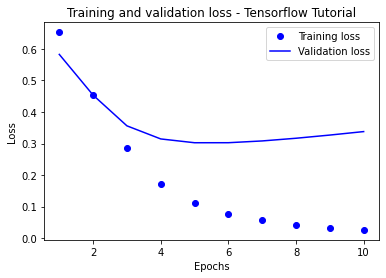

In [ ]:
loss_values= history_dict ['loss']
val_loss_values = history_dict ['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title("Training and validation loss - Tensorflow Tutorial")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

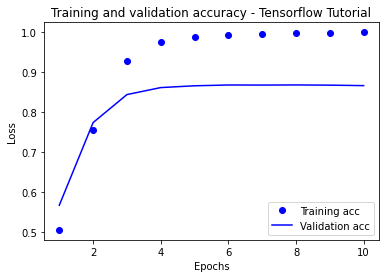

In [ ]:
plt.clf()

acc = history_dict ['accuracy']
val_acc = history_dict ['val_accuracy']

plt.plot(epochs, acc , 'bo', label = 'Training acc')
plt.plot(epochs, val_acc , 'b', label = 'Validation acc')
plt.title("Training and validation accuracy - Tensorflow Tutorial")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()